In [1]:
import os
import sys 
sys.path.append("../")
import json 
import torch 
import torchvision 
import numpy as np 
from src.lrp import construct_lrp
from src.data import preprocess

# ============================================
# change!
data_path = "/data3/bumjin_data/ILSVRC2012_val"
testset = torchvision.datasets.ImageNet(root=data_path, split="val")
# ============================================

model = torchvision.models.vgg16(pretrained=True)
model.to("cuda:0")
model.eval()
lrp_model = construct_lrp(model, "cuda:0")

/home/bumjin/anaconda3/envs/deeping/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

# ===================================
# Which CNN layer / CNN filter index / samples?
layer = 0
conept_ids = [43,44,45,46]
samples = [4096,5105,7102,2838,1128] + [5359,5396,2230,5387,5368]
# ===================================
assert 0<= layer <=12

dict = {f"{c_id}_crp":[] for c_id in conept_ids}
lrp_list = []


for data_index in samples:
    img, y = testset[data_index]
    x = preprocess(img).cuda().unsqueeze(0)
    lrps = lrp_model.forward(x, y, class_specific=True)['all_relevnaces'][::-1]   # from Relevance 0,1,2,3,...
    lrp = lrps[0].squeeze(0)
    lrp_list.append(lrp)


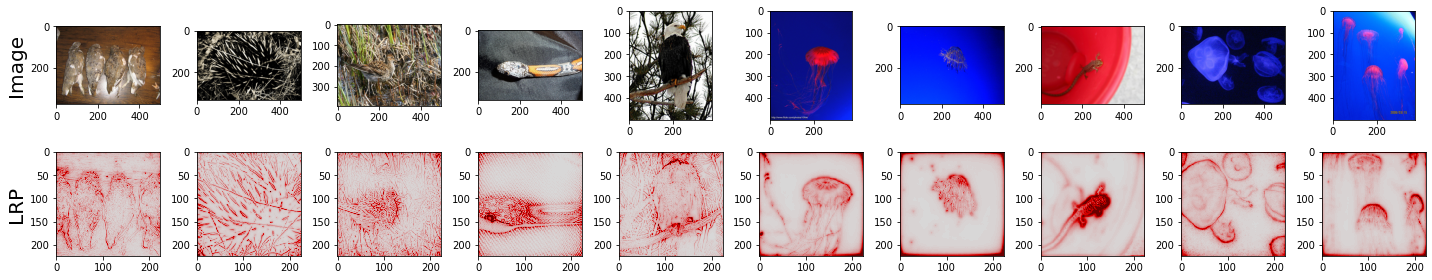

In [3]:
import matplotlib.pyplot as plt 
from src.lrp import process_lrp_before_imshow


# === Plot Image and LRP ===
fig, axes = plt.subplots(2, len(samples), figsize=(20,4), facecolor="white")
for i, index in enumerate(samples):
    img = testset[index][0]
    axes[0,i].imshow(img)
for j in range(len(samples)):
    item = lrp_list[j]
    item = item.permute(1,2,0).cpu().detach().numpy()
    R = item.sum(axis=-1)
    R, kwargs = process_lrp_before_imshow(R)
    axes[1,j].imshow(R, **kwargs)

axes[0,0].set_ylabel("Image", fontsize=20)
axes[1,0].set_ylabel("LRP",  fontsize=20)
plt.tight_layout()
